#Exercise

Estimate the location from WIFI Signal Strength
The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.
You can use ANN analysis for this exerise to improve the ANN performance.

In [1]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#Read dataset

In [34]:
# Importing the dataset
import numpy as np
import pandas as pd

path = '/drive/My Drive/Colab Notebooks/wifi.csv'
data = pd.read_csv(path)
data.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi 1  2000 non-null   int64
 1   Wifi 2  2000 non-null   int64
 2   Wifi 3  2000 non-null   int64
 3   Wifi 4  2000 non-null   int64
 4   Wifi 5  2000 non-null   int64
 5   Wifi 6  2000 non-null   int64
 6   Wifi 7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#Check Missing Value

In [36]:
# check for missing values
print(data.isnull().sum())

Wifi 1    0
Wifi 2    0
Wifi 3    0
Wifi 4    0
Wifi 5    0
Wifi 6    0
Wifi 7    0
Room      0
dtype: int64


#One hot encoding

In [37]:
# perform one hot encoding using the pandas get_dummies function
one_hot = pd.get_dummies(data['Room'])

# merge the one hot encoded variables back into the original dataframe
df = pd.concat([data, one_hot], axis=1)

# drop the original room column
df = df.drop('Room', axis=1)

df.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,1,2,3,4
0,-64,-56,-61,-66,-71,-82,-81,1,0,0,0
1,-68,-57,-61,-65,-71,-85,-85,1,0,0,0
2,-63,-60,-60,-67,-76,-85,-84,1,0,0,0
3,-61,-60,-68,-62,-77,-90,-80,1,0,0,0
4,-63,-65,-60,-63,-77,-81,-87,1,0,0,0


#Split Dataset

In [49]:
X = df.iloc[:,:-4]
y = df.iloc[:,-4:]

#Check if excluded one hot enconde columns
X.head().T
y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [50]:
from numpy.random.mtrand import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state = 2)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (1600, 7)
y_train shape (1600, 4)
X_test shape (400, 7)
y_test shape (400, 4)


#Normalization

In [51]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fit the Model

In [58]:
# Sequential required for NN model, layer Dense uses linear regression
from keras.models import Sequential
from keras.layers import Dense, Dropout

# building the sequential model
L1 = 64
L2 = 128

model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu')) #first layer
model.add(Dense(L2,activation='relu')) #second layer no need input dim

# output layer
model.add(Dense(4, activation="softmax"))

# compile nerual network
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# training model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 1.1583 - accuracy: 0.5756 - val_loss: 0.8681 - val_accuracy: 0.8250
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.8750 - val_loss: 0.4911 - val_accuracy: 0.9100
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.9306 - val_loss: 0.2897 - val_accuracy: 0.9550
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9513 - val_loss: 0.1952 - val_accuracy: 0.9550
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9575 - val_loss: 0.1465 - val_accuracy: 0.9650
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1330 - accuracy: 0.9613 - val_loss: 0.1221 - val_accuracy: 0.9650
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9650 - val_loss: 0.1024 - val_accuracy: 0.9700
Epoch 8/50
16/16 [=

#Model with initializers and regularizers

In [59]:
from keras import initializers
from keras import regularizers

# neurons in hidden layers
L1 = 32
L2 = 64
# model architecture
model = Sequential()
model.add(Dense(L1, input_dim=7, activation="relu",
              kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2, activation="relu"))

#output layer
model.add(Dense(4, activation="softmax"))

#compile model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# training model
history2 = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 1.7375 - accuracy: 0.5131 - val_loss: 1.4722 - val_accuracy: 0.7700
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 1.3120 - accuracy: 0.8288 - val_loss: 1.1496 - val_accuracy: 0.8650
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 1.0546 - accuracy: 0.8963 - val_loss: 0.9505 - val_accuracy: 0.9225
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.9300 - val_loss: 0.8279 - val_accuracy: 0.9425
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7892 - accuracy: 0.9506 - val_loss: 0.7457 - val_accuracy: 0.9500
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7176 - accuracy: 0.9519 - val_loss: 0.6867 - val_accuracy: 0.9650
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.9569 - val_loss: 0.6384 - val_accuracy: 0.9700
Epoch 8/50
16/16 [=

#Visualize the model performance

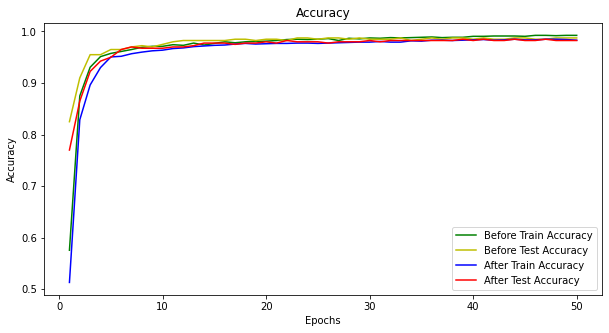

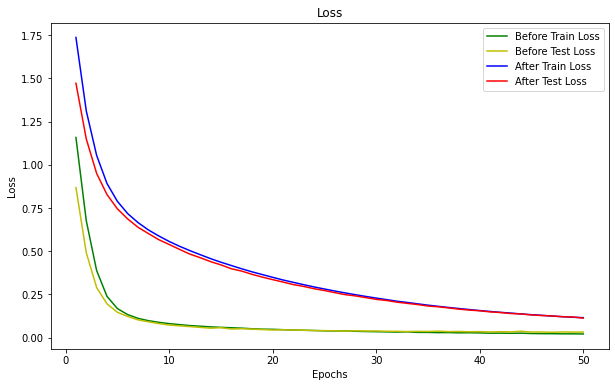

In [60]:
import matplotlib.pyplot as plt

# model evaluation with visualisation
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

# model evaluation with visualisation
acc2 = history2.history["accuracy"]
val_acc2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]

epochs2 = range(1, len(acc2)+1)

# visualisation
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, "g", label="Before Train Accuracy")
plt.plot(epochs, val_acc, "y", label="Before Test Accuracy")
plt.plot(epochs2, acc2, "b", label="After Train Accuracy")
plt.plot(epochs2, val_acc2, "r", label="After Test Accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,6))
plt.plot(epochs, loss,'g', label='Before Train Loss')
plt.plot(epochs, val_loss, 'y', label='Before Test Loss')
plt.plot(epochs2, loss2,'b', label='After Train Loss')
plt.plot(epochs2, val_loss2, 'r', label='After Test Loss')
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()